# Plotting results

In [56]:
using HDF5, AeroAcoustics, JLD2, DataFrames
import FileIO

import ColorSchemes.viridis
using Colors

import PGFPlotsX: Axis, Plot, @pgf, TikzDocument, GroupPlot, TikzPicture, Coordinates, push_preamble!
using LaTeXStrings, LatexPrint

### Case I: Boundary conditions

* Dataset: b7a
* BC: None, Zero, Periodic, Extended
* Frequency: 700,800,1000,1500,2000,2500,5000
* Domain: -0.2:0.2
* No regularization!
* kmax: 3000
* tol: 1e-5

** Load data for case I**

In [57]:
data = read(h5open("ab7aCsmEss.h5"))
dataref = read(h5open("ab7aCsmOpt.h5"))
file = jldopen("BeBeC2018_data_caseI.jld2", "r")
micgeom = data["MetaData"]["ArrayAttributes"]["microphonePositionsM"]
Env = file["common_params/environment"];
EnvL = file["deconv/environment_large"];

### Data

In [58]:
df = file["analysis/diff"]

28×3 DataFrames.DataFrame
│ Row │ BC            │ source    │
├─────┼───────────────┼───────────┤
│ 1   │ "noBC"        │ "Source3" │
│ 2   │ "noBC"        │ "Source2" │
│ 3   │ "noBC"        │ "Source0" │
│ 4   │ "noBC"        │ "Source1" │
│ 5   │ "zeroBC"      │ "Source3" │
│ 6   │ "zeroBC"      │ "Source2" │
│ 7   │ "zeroBC"      │ "Source0" │
│ 8   │ "zeroBC"      │ "Source1" │
│ 9   │ "replicateBC" │ "Source3" │
│ 10  │ "replicateBC" │ "Source2" │
│ 11  │ "replicateBC" │ "Source0" │
⋮
│ 17  │ "circularBC"  │ "Source3" │
│ 18  │ "circularBC"  │ "Source2" │
│ 19  │ "circularBC"  │ "Source0" │
│ 20  │ "circularBC"  │ "Source1" │
│ 21  │ "reflectBC"   │ "Source3" │
│ 22  │ "reflectBC"   │ "Source2" │
│ 23  │ "reflectBC"   │ "Source0" │
│ 24  │ "reflectBC"   │ "Source1" │
│ 25  │ "extendedBC"  │ "Source3" │
│ 26  │ "extendedBC"  │ "Source2" │
│ 27  │ "extendedBC"  │ "Source0" │
│ 28  │ "extendedBC"  │ "Source1" │

│ Row │ diff                                                                     │
├─────┼──────────────────────────────────────────────────────────────────────────┤
│ 1   │ [-419.395, -63.7032, -418.977, 0.0633491, 0.670268, 0.814147, 0.888166]  │
│ 2   │ [-15.3374, -14.0903, -419.23, 0.0794607, 0.587039, 0.730232, 0.917395]   │
│ 3   │ [-14.591, -15.3516, -419.372, 0.0986712, 0.559745, 0.697759, 0.780115]   │
│ 4   │ [-419.067, -60.487, -419.308, 0.0921338, 0.563861, 0.728314, 0.80298]    │
│ 5   │ [-419.395, -419.133, -418.977, 0.456133, 0.775761, 0.923983, 0.711405]   │
│ 6   │ [-419.374, -419.22, -419.23, 0.476304, 0.724323, 0.842291, 1.00479]      │
│ 7   │ [-419.34, -419.252, -17.2251, 0.491849, 0.761437, 0.92566, 0.780402]     │
│ 8   │ [-419.067, -419.104, -419.308, 0.491593, 0.766722, 0.873308, 0.737684]   │
│ 9   │ [-11.9912, -10.5964, -11.1762, 0.485652, 0.772819, 0.922538, 0.782628]   │
│ 10  │ [-11.9279, -10.2733, -13.9844, 0.491207, 0.748491, 0.797993, 1.04765]    │
│ 11  │ [-11.8748, -10.7952, -18.7448, 0.502722, 0.678503, 0.825521, 0.783548]   │
⋮
│ 17  │ [-419.395, -419.133, -418.977, 0.0373051, 0.659249, 0.831206, 0.890424]  │
│ 18  │ [-419.374, -419.22, -419.23, 0.0551649, 0.573705, 0.745759, 0.918356]    │
│ 19  │ [-419.34, -419.252, -419.372, 0.0699644, 0.548161, 0.705099, 0.782179]   │
│ 20  │ [-419.067, -419.104, -419.308, 0.0693865, 0.554294, 0.735883, 0.790966]  │
│ 21  │ [-419.395, -60.8524, -418.977, -0.0509769, 0.595279, 0.786595, 0.833234] │
│ 22  │ [-419.374, -28.9337, -419.23, -0.00940477, 0.534944, 0.687944, 0.854245] │
│ 23  │ [-419.34, -27.4598, -419.372, -0.00251595, 0.497157, 0.642786, 0.70211]  │
│ 24  │ [-419.067, -69.079, -419.308, -0.000635272, 0.50326, 0.677717, 0.711847] │
│ 25  │ [-1.83186, 0.793376, 0.762476, 0.634618, 0.740911, 0.797592, 0.736719]   │
│ 26  │ [-1.71064, 0.422912, 0.664749, 0.628332, 0.705484, 0.716612, 0.697806]   │
│ 27  │ [-1.78246, 0.643304, 0.671158, 0.697372, 0.641254, 0.767319, 0.706991]   │
│ 28  │ [-1.79715, 0.790064, 0.569608, 0.683595, 0.657085, 0.7535, 0.546911]     │

### Generate LaTeX table with level differences

In [59]:
bcs = keys(file["deconv"])
pop!(bcs);
src = "Source3"
dfl = Matrix{Float64}(length(Env.f),length(bcs))
i = 1
for bc in bcs
    dfl[i,:] = vec(hcat(df[(df[:BC].==bc) .& (df[:source].==src),:diff])...)
    i += 1
end
dfl[dfl.<-1] = NaN
dfl

7×7 Array{Float64,2}:
 NaN  NaN         NaN          0.0633491  0.670268  0.814147  0.888166
 NaN  NaN         NaN          0.456133   0.775761  0.923983  0.711405
 NaN  NaN         NaN          0.485652   0.772819  0.922538  0.782628
 NaN  NaN         NaN          0.0214865  0.642759  0.834083  0.890058
 NaN  NaN         NaN          0.0373051  0.659249  0.831206  0.890424
 NaN  NaN         NaN         -0.0509769  0.595279  0.786595  0.833234
 NaN    0.793376    0.762476   0.634618   0.740911  0.797592  0.736719

In [60]:
lap([[L"\Delta L" Env.f'];bcs round.(dfl,1)])

\left[
\begin{array}{cccccccc}
\text{$\Delta L$} & 700.0 & 800.0 & 1000.0 & 1500.0 & 2000.0 & 2500.0 & 5000.0 \\
\text{noBC} & \text{NaN} & \text{NaN} & \text{NaN} & 0.1 & 0.7 & 0.8 & 0.9 \\
\text{zeroBC} & \text{NaN} & \text{NaN} & \text{NaN} & 0.5 & 0.8 & 0.9 & 0.7 \\
\text{replicateBC} & \text{NaN} & \text{NaN} & \text{NaN} & 0.5 & 0.8 & 0.9 & 0.8 \\
\text{symmetricBC} & \text{NaN} & \text{NaN} & \text{NaN} & 0.0 & 0.6 & 0.8 & 0.9 \\
\text{circularBC} & \text{NaN} & \text{NaN} & \text{NaN} & 0.0 & 0.7 & 0.8 & 0.9 \\
\text{reflectBC} & \text{NaN} & \text{NaN} & \text{NaN} & -0.1 & 0.6 & 0.8 & 0.8 \\
\text{extendedBC} & \text{NaN} & 0.8 & 0.8 & 0.6 & 0.7 & 0.8 & 0.7 \\
\end{array}
\right]


## Figures

### Microphone geometry and source positions

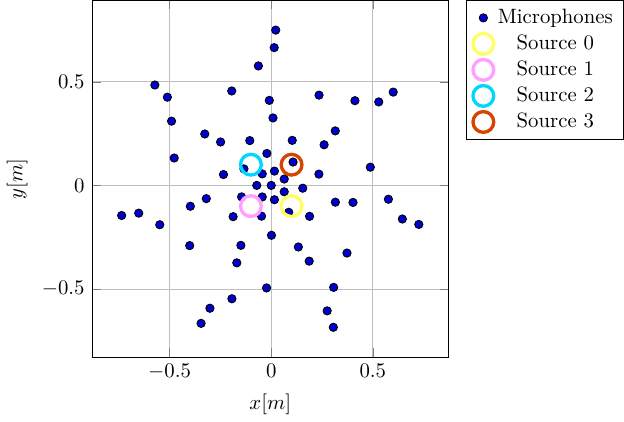

In [61]:
# The geometry 
col = distinguishable_colors(5)

@pgf begin 
    p1 = Plot(Coordinates(micgeom[1:2,:]),{ only_marks , color=col[1] };label="Microphones")
    p2 = Plot(Coordinates([(0.1,-0.1)]),{ only_marks, color=col[2] , mark = "o", mark_size = 5, ultra_thick};label="Source 0")
    p3 = Plot(Coordinates([(-0.1,-0.1)]),{ only_marks, color=col[3] , mark = "o", mark_size = 5, ultra_thick};label="Source 1")
    p4 = Plot(Coordinates([(-0.1,0.1)]),{ only_marks, color=col[4], mark = "o", mark_size = 5, ultra_thick };label="Source 2")
    p5 = Plot(Coordinates([(0.1,0.1)]),{ only_marks, color=col[5], mark = "o", mark_size = 5, ultra_thick };label="Source 3")
    axis = Axis([p1,p2,p3,p4,p5],{height = "3in",width = "3in", grid = "major", xlabel=L"x[m]", ylabel=L"y[m]"})
end
axis_new = copy(axis)
new_options = @pgf {
    legend_style = { at = { "(1.05, 1.0)" } 
                     anchor = "north west" }   }

merge!(axis_new, new_options)

display("image/png", axis_new)

### Case I: Beamforming maps

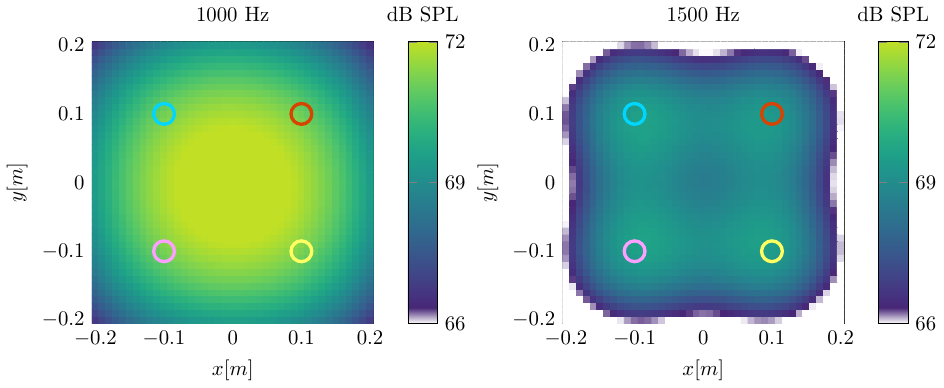

In [62]:
# Declare constants:
Const = Constants(343.0)

# Calculate steering vectors:
V = steeringvectors(Env,Const)
Env
# Calculate beamformer output and point-spread function:
b = beamformer(Env,Const,V)
PSF = pointspreadfunction(Env,Const,V)

xopts = [vec(SPL(b[:,:,3])),vec(SPL(b[:,:,4]))]
titles = ["1000 Hz","1500 Hz"]
plotdata = zip(xopts,titles)

cmax = round.(Int,maximum(maximum.(xopts)))
cmin = cmax-6
clims = join(collect(cmax:-3:cmin)',",")
colormp = viridis[16:12:240]
colormp[1] = RGB{Float64}(1.0,1.0,1.0)
col = distinguishable_colors(5)
@pgf begin
    p1 = Plot(Coordinates([(0.1,-0.1)]),{ only_marks, color=col[2] , mark = "o", mark_size = 5, ultra_thick})
    p2 = Plot(Coordinates([(-0.1,-0.1)]),{ only_marks, color=col[3] , mark = "o", mark_size = 5, ultra_thick})
    p3 = Plot(Coordinates([(-0.1,0.1)]),{ only_marks, color=col[4], mark = "o", mark_size = 5, ultra_thick })
    p4 = Plot(Coordinates([(0.1,0.1)]),{ only_marks, color=col[5], mark = "o", mark_size = 5, ultra_thick })
end

plots = [p1,p2,p3,p4];

@pgf begin 
    td = TikzDocument()
    cmap = "viridis2"
    push_preamble!(td, (cmap, colormp))

    tp = TikzPicture()
    
    push!(td,tp)
    gp = GroupPlot({ group_style = {group_size = "2 by 1",horizontal_sep = "3.2cm",vertical_sep = "2cm" }})
    
    push!(tp,gp)
    
    for (xopt,titl) in plotdata
        p = Plot(Coordinates(Env.Rxy[1:2,:]; metadata = xopt),
            {
            "matrix plot*",
            mark = "only marks",
            point_meta = "explicit",
            point_meta_min = cmin,
            point_meta_max = cmax,
            "mesh/rows"= Env.Nx,
            "mesh/cols" = Env.Ny })
        
        push!(gp, [p,plots], 
            {enlargelimits = false, 
            colorbar,
            height = "2.5in",
            width = "2.5in", 
            colormap_name = "viridis2", 
            colorbar_style = " title = dB SPL, ytick={$clims}",
            "xtick = {-0.2, -0.1, 0, 0.1 , 0.2}",
            "ytick = {-0.2, -0.1, 0, 0.1 , 0.2}",
            xlabel = L"x [m]",
            ylabel = L"y [m]",
            title = "$titl"
            })
    end

end

display("image/png", td)

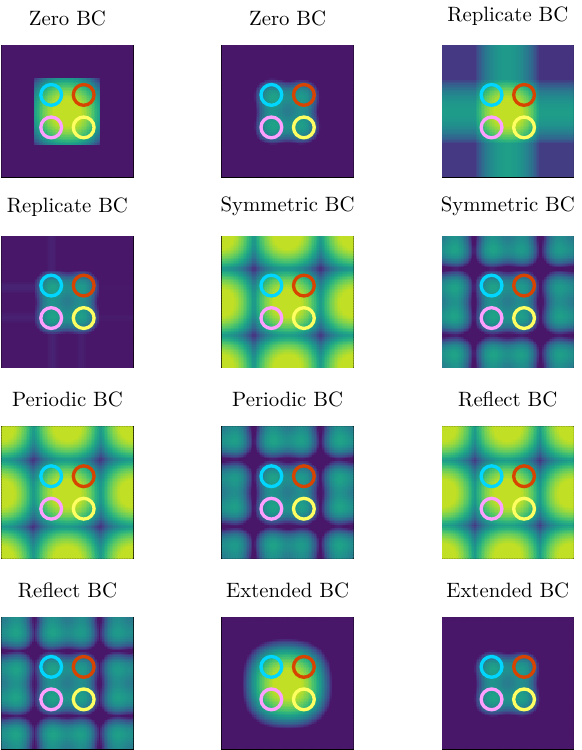

In [63]:
bzero = file["beamformingmaps/zeroBC"]
brep = file["beamformingmaps/replicateBC"]
bsym = file["beamformingmaps/symmetricBC"]
bcirc = file["beamformingmaps/circularBC"]
bex = file["beamformingmaps/extendedBC"]
bref = file["beamformingmaps/reflectBC"]

xopts = [vec(SPL(bzero[:,:,3])),vec(SPL(bzero[:,:,4])),
    vec(SPL(brep[:,:,3])),vec(SPL(brep[:,:,4])),
    vec(SPL(bsym[:,:,3])),vec(SPL(bsym[:,:,4])),
    vec(SPL(bcirc[:,:,3])),vec(SPL(bcirc[:,:,4])),
    vec(SPL(bref[:,:,3])),vec(SPL(bref[:,:,4])),
    vec(SPL(bex[:,:,3])),vec(SPL(bex[:,:,4]))]
titles = ["Zero BC","Zero BC",
        "Replicate BC","Replicate BC",
        "Symmetric BC","Symmetric BC",
        "Periodic BC", "Periodic BC",
        "Reflect BC","Reflect BC",
        "Extended BC","Extended BC"]

plotdata = zip(xopts,titles)

xd = repeat(-0.4:0.01:0.4, outer = 81)
yd = repeat(-0.4:0.01:0.4, inner = 81)

cmax = round.(Int,maximum(maximum.(xopts)))
cmin = cmax-6
clims = join(collect(cmax:-3:cmin)',",")
colormp = viridis[16:12:240]
col = distinguishable_colors(5)
@pgf begin
    p1 = Plot(Coordinates([(0.1,-0.1)]),{ only_marks, color=col[2] , mark = "o", mark_size = 5, ultra_thick})
    p2 = Plot(Coordinates([(-0.1,-0.1)]),{ only_marks, color=col[3] , mark = "o", mark_size = 5, ultra_thick})
    p3 = Plot(Coordinates([(-0.1,0.1)]),{ only_marks, color=col[4], mark = "o", mark_size = 5, ultra_thick })
    p4 = Plot(Coordinates([(0.1,0.1)]),{ only_marks, color=col[5], mark = "o", mark_size = 5, ultra_thick })
end

plots = [p1,p2,p3,p4];

@pgf begin 
    td = TikzDocument()
    cmap = "viridis2"
    push_preamble!(td, (cmap, colormp))

    tp = TikzPicture()
    
    push!(td,tp)
    gp = GroupPlot({ group_style = {group_size = "3 by 4",horizontal_sep = "1.5cm",vertical_sep = "1cm" }})
    
    push!(tp,gp)
    
    for (xopt,titl) in plotdata
        p = Plot(Coordinates(hcat(xd, yd)'; metadata = xopt),
            {
            "matrix plot*",
            mark = "only marks",
            point_meta = "explicit",
            point_meta_min = cmin,
            point_meta_max = cmax,
            "mesh/rows"= 2Env.Nx-1,
            "mesh/cols" = 2Env.Ny-1 })
        
        push!(gp, [p,plots], 
            {enlargelimits = false, 
            #colorbar,
            height = "1.5in",
            width = "1.5in", 
            #colormap_name = "viridis2", 
            #colorbar_style = " title = dB SPL, ytick={$clims}",
            xmajorticks=false,
            ymajorticks=false,
            #"xtick = {}",
            #"ytick = {}",
            #xlabel = L"x [m]",
            #ylabel = L"y [m]",
            title = "$titl"
            })
    end

end

display("image/png", td)

### Resolution due to Rayleighs criterion

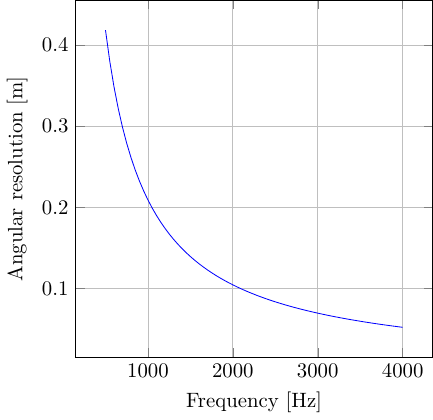

In [32]:
fo = 500:50:4000
L = 0.75
D = 1.5
λ = 343./fo
R = 1.22*L.*λ./D
@pgf begin
plot = Plot(Coordinates(fo,R),{mark="none"})
ax = Axis(
        plot,
        {
            grid="major",
            xlabel="Frequency [Hz]",
            ylabel="Angular resolution [m]",
            height = "3in",
            width = "3in",
            xticklabel_style =
        {
            "/pgf/number format/.cd",
            "1000 sep={\}"
        }
        }
    )
end

display("image/png", ax)

### Deconvolution maps

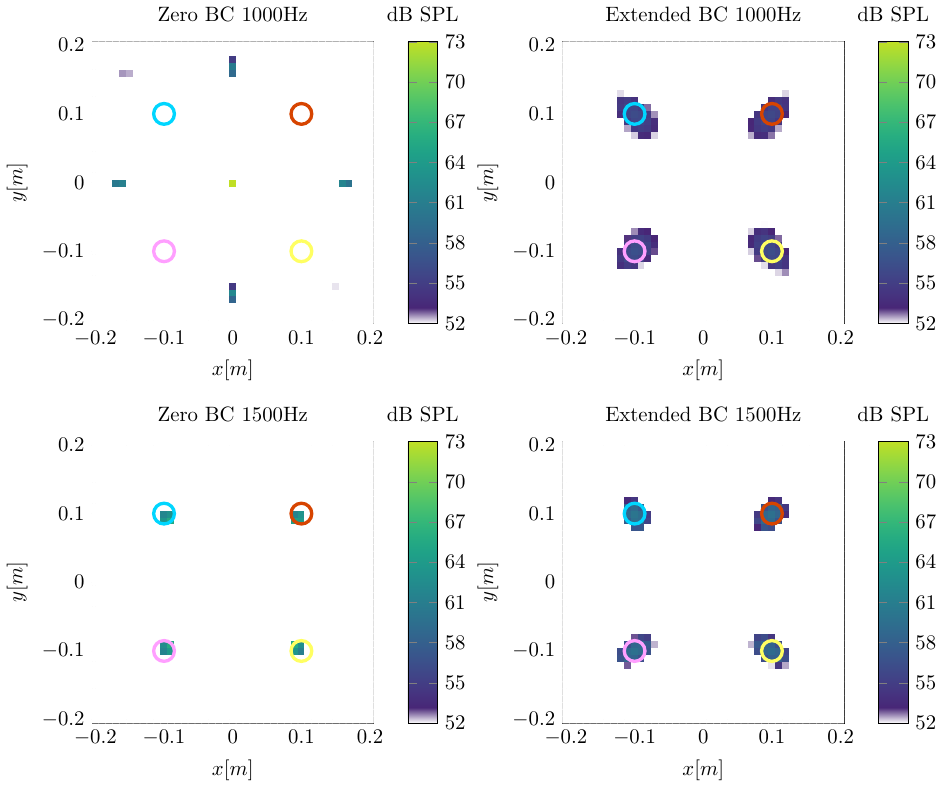

In [64]:
xzero1 = SPL(vec(file["deconv/zeroBC"].xopt[:,:,3]))
xex1 = SPL(vec(file["deconv/extendedBC"].xopt[:,:,3]))
xzero2 = SPL(vec(file["deconv/zeroBC"].xopt[:,:,4]))
xex2 = SPL(vec(file["deconv/extendedBC"].xopt[:,:,4]))

xopts = [xzero1,xex1,xzero2,xex2]
titles = ["Zero BC 1000Hz","Extended BC 1000Hz","Zero BC 1500Hz","Extended BC 1500Hz"]
plotdata = zip(xopts,titles)

cmax = round.(Int,maximum(maximum.(xopts)))
cmin = cmax-21
clims = join(collect(cmax:-3:cmin)',",")
colormp = viridis[16:12:240]
colormp[1] = RGB{Float64}(1.0,1.0,1.0)

@pgf begin 
    td = TikzDocument()
    cmap = "viridis2"
    push_preamble!(td, (cmap, colormp))

    tp = TikzPicture()
    
    push!(td,tp)
    gp = GroupPlot({ group_style = {group_size = "2 by 2",horizontal_sep = "3.2cm",vertical_sep = "2cm"}})
    
    push!(tp,gp)
    
    for (xopt,titl) in plotdata
        p = Plot(Coordinates(Env.Rxy[1:2,:]; metadata = xopt),
            {
            "matrix plot*",
            mark = "only marks",
            point_meta = "explicit",
            point_meta_min = cmin,
            point_meta_max = cmax,
            "mesh/rows"= Env.Nx,
            "mesh/cols" = Env.Ny,
            })
        
        push!(gp, [p,plots], 
            {enlargelimits = false, 
            colorbar,
            height = "2.5in",
            width = "2.5in", 
            colormap_name = "viridis2", 
            colorbar_style = " title = dB SPL, ytick={$clims}",
            "xtick = {-0.2, -0.1, 0, 0.1 , 0.2}",
            "ytick = {-0.2, -0.1, 0, 0.1 , 0.2}",
            xlabel = L"x [m]",
            ylabel = L"y [m]",
            title = "$titl",
            grid = "major"
            })
    end

end

display("image/png", td)

In [34]:
close(file)

## Case II: Regularization

In [35]:
data = read(h5open("ab7bCsmEss.h5"))
dataref = read(h5open("ab7bCsmOpt.h5"))
file = jldopen("BeBeC2018_data_caseII.jld2", "r")
micgeom = data["MetaData"]["ArrayAttributes"]["microphonePositionsM"]
Env = file["common_params/environment"];

### Beamforming maps

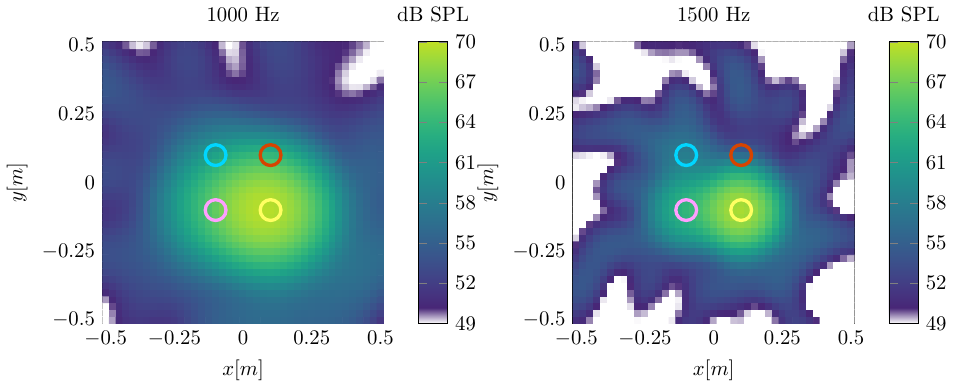

In [36]:
# Declare constants:
Const = Constants(343.0)

# Calculate steering vectors:
V = steeringvectors(Env,Const)

# Calculate beamformer output and point-spread function:
b = beamformer(Env,Const,V)
PSF = pointspreadfunction(Env,Const,V)

xopts = [vec(SPL(b[:,:,11])),vec(SPL(b[:,:,21]))]
titles = ["1000 Hz","1500 Hz"]
plotdata = zip(xopts,titles)

cmax = round.(Int,maximum(maximum.(xopts)))
cmin = cmax-21
clims = join(collect(cmax:-3:cmin)',",")
colormp = viridis[16:12:240]
colormp[1] = RGB{Float64}(1.0,1.0,1.0)
col = distinguishable_colors(5)
@pgf begin
    p1 = Plot(Coordinates([(0.1,-0.1)]),{ only_marks, color=col[2] , mark = "o", mark_size = 5, ultra_thick})
    p2 = Plot(Coordinates([(-0.1,-0.1)]),{ only_marks, color=col[3] , mark = "o", mark_size = 5, ultra_thick})
    p3 = Plot(Coordinates([(-0.1,0.1)]),{ only_marks, color=col[4], mark = "o", mark_size = 5, ultra_thick })
    p4 = Plot(Coordinates([(0.1,0.1)]),{ only_marks, color=col[5], mark = "o", mark_size = 5, ultra_thick })
end

plots = [p1,p2,p3,p4];

@pgf begin 
    td = TikzDocument()
    cmap = "viridis2"
    push_preamble!(td, (cmap, colormp))

    tp = TikzPicture()
    
    push!(td,tp)
    gp = GroupPlot({ group_style = {group_size = "2 by 1",horizontal_sep = "3.2cm",vertical_sep = "2cm" }})
    
    push!(tp,gp)
    
    for (xopt,titl) in plotdata
        p = Plot(Coordinates(Env.Rxy[1:2,:]; metadata = xopt),
            {
            "matrix plot*",
            mark = "only marks",
            point_meta = "explicit",
            point_meta_min = cmin,
            point_meta_max = cmax,
            "mesh/rows"= Env.Nx,
            "mesh/cols" = Env.Ny })
        
        push!(gp, [p,plots], 
            {enlargelimits = false, 
            colorbar,
            height = "2.5in",
            width = "2.5in", 
            colormap_name = "viridis2", 
            colorbar_style = " title = dB SPL, ytick={$clims}",
            "xtick = {-0.5, -0.25, 0, 0.25 , 0.5}",
            "ytick = {-0.5, -0.25, 0, 0.25 , 0.5}",
            xlabel = L"x [m]",
            ylabel = L"y [m]",
            title = "$titl"
            })
    end

end

display("image/png", td)

### Level differences as function of $\lambda$

In [38]:
lambdas = file["common_params/lambdas"]
df = file["analysis/diff"]
proxL1 = Matrix{Float64}(length(lambdas),4)
proxL2 = Matrix{Float64}(length(lambdas),4)
srcs = ["Source0","Source1","Source2","Source3"]
algs = ["proxL1","proxL2"]
indf = 21
i = 1
for src in srcs
    dfl = df[(df[:alg].==algs[1]) .& (df[:source].=="$src"),[:lambda,:diff]]
    dfm = df[(df[:alg].==algs[2]) .& (df[:source].=="$src"),[:lambda,:diff]]
    sort!(dfl,cols = (:lambda))
    sort!(dfm,cols = (:lambda))
    proxL1[:,i] = vec(hcat(dfl[:diff]...)'[:,indf])
    proxL2[:,i] = vec(hcat(dfm[:diff]...)'[:,indf])
    i += 1
end
proxL1[proxL1.<-10] = NaN
proxL2[proxL2.<-10] = NaN

proxL3 = Matrix{Float64}(length(lambdas),4)
proxL4 = Matrix{Float64}(length(lambdas),4)
indf = 51
i = 1
for src in srcs
    dfl = df[(df[:alg].==algs[1]) .& (df[:source].=="$src"),[:lambda,:diff]]
    dfm = df[(df[:alg].==algs[2]) .& (df[:source].=="$src"),[:lambda,:diff]]
    sort!(dfl,cols = (:lambda))
    sort!(dfm,cols = (:lambda))
    proxL3[:,i] = vec(hcat(dfl[:diff]...)'[:,indf])
    proxL4[:,i] = vec(hcat(dfm[:diff]...)'[:,indf])
    i += 1
end
proxL3[proxL3.<-10] = NaN;
proxL4[proxL4.<-10] = NaN;

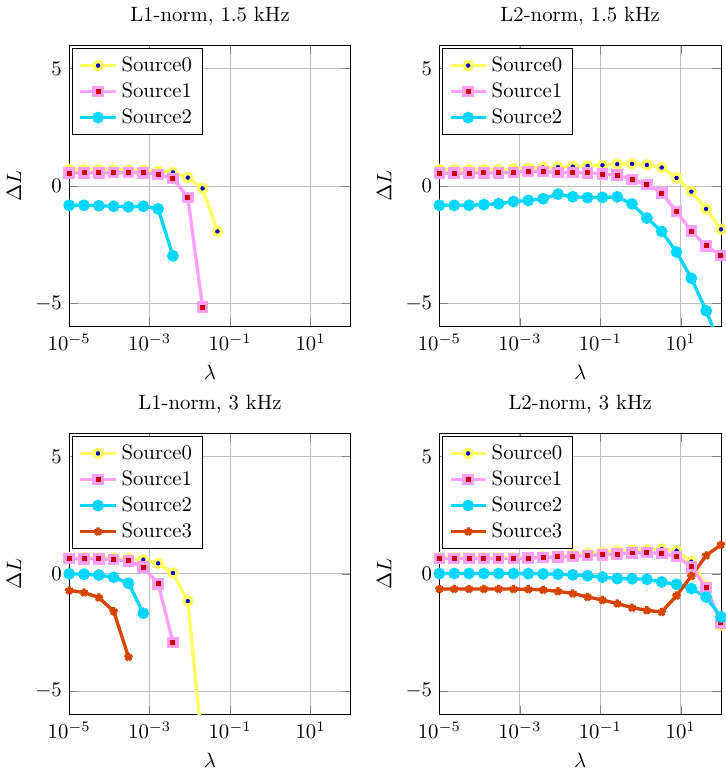

In [41]:
col = distinguishable_colors(5)[2:5]

@pgf gp = GroupPlot({ group_style = {group_size = "2 by 2",horizontal_sep = "1.5cm", vertical_sep = "1.8cm"}})
pr = [proxL1,proxL2,proxL3,proxL4]
titles = ["L1-norm, 1.5 kHz","L2-norm, 1.5 kHz","L1-norm, 3 kHz","L2-norm, 3 kHz"]
plotdata = zip(pr,titles)

@pgf begin 
for (pr,titles) in plotdata

plots = []
i = 1    

for src in srcs
    plot = Plot(Coordinates(lambdas,pr[:,i]), {color=col[i],style = { ultra_thick }}; label = "$src")
    push!(plots,plot)
    i += 1
end

push!(gp, plots, {ymin = -6, ymax = 6, xmin = 1e-5,xmax = 1e2, height = "2.5in" ,width = "2.5in",xlabel=L"\lambda",ylabel=L"\Delta L", 
            grid = "major",xmode = "log",title="$titles", 
            legend_style = "anchor = north west, at = {(0.01, 0.99)} "},"xtick = {1e-5,1e-3,1e-1,1e1}")

end
    
end

display("image/png", gp)

### Level differences as function of frequency

In [47]:
lambdas = file["common_params/lambdas"]
df = file["analysis/diff"];

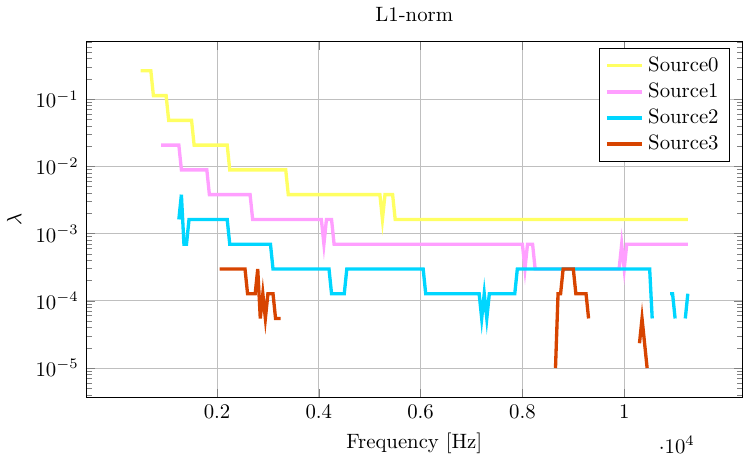

In [51]:
diffopt = Matrix{Float64}(length(Env.f),4)
lamopt = Matrix{Float64}(length(Env.f),4)
i=1
lvl = 2

for src in srcs
    dmat = hcat(df[(df[:source].==src) .& (df[:alg].=="proxL1"),:diff]...)'
    lamopt[:,i] = [isempty(find(abs.(dmat[:,i]).<lvl)) ? NaN : lambdas[maximum(find(abs.(dmat[:,i]).<lvl))] for i in 1:length(Env.f)]
    diffopt[:,i] = [isempty(find(abs.(dmat[:,i]).<lvl)) ? NaN : dmat[maximum(find(abs.(dmat[:,i]).<lvl)),i] for i in 1:length(Env.f)]
    i+=1
end

@pgf begin 

plots = []
i = 1    

for src in srcs
    plot = Plot(Coordinates(Env.f,lamopt[:,i]), {mark="none",color=col[i],style = { ultra_thick }}; label = "$src")
    push!(plots,plot)
    i += 1
end

ax2 = Axis(plots,{"unbounded coords=jump",height = "3in" ,width = "5in",xlabel="Frequency [Hz]",ylabel=L"\lambda", "xtick = {2000,4000,6000,8000,10000}",
        grid = "major",ymode="log",title="L1-norm"})

end

display("image/png", ax2)

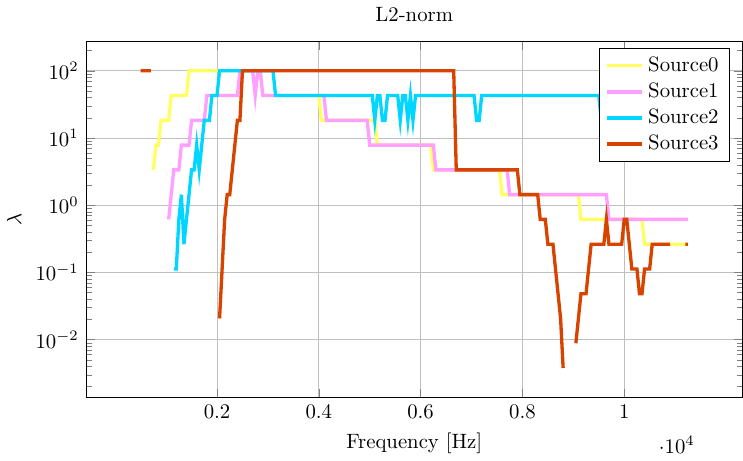

In [52]:
i=1
for src in srcs
    dmat = hcat(df[(df[:source].==src) .& (df[:alg].=="proxL2"),:diff]...)'
    lamopt[:,i] = [isempty(find(abs.(dmat[:,i]).<lvl)) ? NaN : lambdas[maximum(find(abs.(dmat[:,i]).<lvl))] for i in 1:length(Env.f)]
    diffopt[:,i] = [isempty(find(abs.(dmat[:,i]).<lvl)) ? NaN : dmat[maximum(find(abs.(dmat[:,i]).<lvl)),i] for i in 1:length(Env.f)]
    i+=1
end

@pgf begin 

plots = []
i = 1    

for src in srcs
    plot = Plot(Coordinates(Env.f,lamopt[:,i]), {mark="none",color=col[i],style = { ultra_thick }}; label = "$src")
    push!(plots,plot)
    i += 1
end

ax2 = Axis(plots,{"unbounded coords=jump",height = "3in" ,width = "5in",xlabel="Frequency [Hz]",ylabel=L"\lambda", "xtick = {2000,4000,6000,8000,10000}",
        grid = "major",ymode="log",title="L2-norm"})

end
display("image/png", ax2)

In [55]:
close(file)